In [28]:
import numpy as np
import matplotlib.pyplot as plt

Task 01 - Building your data set


In [42]:
# random input numbers
x = np.random.rand(100)

# targets
f = lambda x: -x**3+x**2
#f = lambda x: np.sin(5*x)+1
t = f(x)

# putting it in one array
data = np.stack([x, t], axis=1)

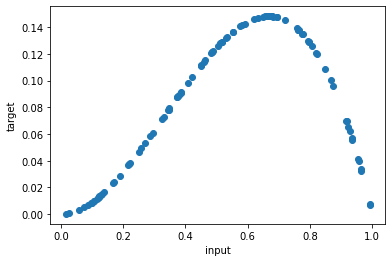

In [43]:
# visualize datapoints
plt.scatter(x, t)
plt.xlabel('input')
plt.ylabel('target')
plt.show()

In [35]:
# relu activation function
def relu(x):
  x[x<0] = 0
  return x

# derivative of relu function
def relu_derivative(x):
  x[x>=0] = 1
  x[x<0] = 0 
  return x
  
# mean squared error function
def mse(y, t):
  return 1/2 * ((y - t)**2)

Task 02 - Perceptrons

In [36]:
# one perceptron layer
class Layer(object):

  # instanciated with number of units of this and preceding layer
  def __init__(self, n_units, input_units):
    self.bias = np.zeros(n_units)
    self.weights = np.random.rand(input_units, n_units)

    self.input = None
    self.preactivation = None
    self.activation = None

  # forward method for activation
  # returns each unit's activation
  def forward_step(self, input):
    self.input = input
    self.preactivation = input @ self.weights + self.bias
    self.activation = relu(self.preactivation)
    return self.activation

  # backwards method for backpropagation
  # calculates the gradients and 
  # updates each unit's parameters accordingly
  def backward_step(self, dLda, lr): # dLda = loss-activation derivative obtained from layer l+1 or directly from loss function derivative
    # compute gradients 
    error_signal = relu_derivative(self.preactivation) * dLda # bias gradients
    weights_grad = (np.transpose(self.input) @ error_signal) 
    new_dLda = error_signal @ np.transpose(self.weights)

    # update parameters
    self.weights = self.weights - (lr * weights_grad)
    self.bias = self.bias - (lr * error_signal)

    return new_dLda

Task 03 - Multi-Layer Perceptron

In [37]:
# whole multi-layer perceptron
class MLP(object):

  # instanciated with learning rate and a list unit sizes of all layers
  def __init__(self, lr, layers):
    self.lr = lr
    self.layers = []
    n_input = 1
    for n_units in layers:
       self.layers.append(Layer(n_units, n_input))
       n_input = n_units

  # forward propagation of one datapoint
  # returns output of the layer 
  def forward_step(self, data_point):
    layer_input = np.array([data_point[0]]).reshape(1,1)
    for layer in self.layers:
      layer_input = layer.forward_step(layer_input)
    return layer_input

  def backpropagation(self, data_point, prediction):
    dLda = prediction - data_point[1] # derivative for mse loss function
    for layer in reversed(self.layers):
      dLda = layer.backward_step(dLda, self.lr)

Task 04 - Training

In [46]:
# MLP with 1 hidden layer (10 units) & output layer (1 unit)
nn = MLP(lr=0.005, layers=[10, 1])

losses = [] # saves average loss of epoches
num_epochs = 1000
for epoch in range(num_epochs):
  print('Epoch {0}/{1}:'.format(epoch, num_epochs))
  epoch_losses = [] # saves losses of each data point prediction

  # perform forward and backward steps for each data point
  for data_point in data: 
    prediction = nn.forward_step(data_point)
    # compute mse loss function
    epoch_losses.append(mse(prediction, data_point[1])) 
    nn.backpropagation(data_point, prediction)

  avg_loss = np.mean(epoch_losses) 
  losses.append(avg_loss)
  print('Average Loss: %.6f'%(avg_loss))

print("Training finished.")

Epoch 0/1000:
Average Loss: 0.151220
Epoch 1/1000:
Average Loss: 0.020586
Epoch 2/1000:
Average Loss: 0.010656
Epoch 3/1000:
Average Loss: 0.008343
Epoch 4/1000:
Average Loss: 0.007546
Epoch 5/1000:
Average Loss: 0.007178
Epoch 6/1000:
Average Loss: 0.006963
Epoch 7/1000:
Average Loss: 0.006808
Epoch 8/1000:
Average Loss: 0.006673
Epoch 9/1000:
Average Loss: 0.006540
Epoch 10/1000:
Average Loss: 0.006408
Epoch 11/1000:
Average Loss: 0.006280
Epoch 12/1000:
Average Loss: 0.006156
Epoch 13/1000:
Average Loss: 0.006030
Epoch 14/1000:
Average Loss: 0.005899
Epoch 15/1000:
Average Loss: 0.005771
Epoch 16/1000:
Average Loss: 0.005636
Epoch 17/1000:
Average Loss: 0.005494
Epoch 18/1000:
Average Loss: 0.005341
Epoch 19/1000:
Average Loss: 0.005188
Epoch 20/1000:
Average Loss: 0.005036
Epoch 21/1000:
Average Loss: 0.004888
Epoch 22/1000:
Average Loss: 0.004734
Epoch 23/1000:
Average Loss: 0.004571
Epoch 24/1000:
Average Loss: 0.004407
Epoch 25/1000:
Average Loss: 0.004236
Epoch 26/1000:
Average

Task 05 - Visualization

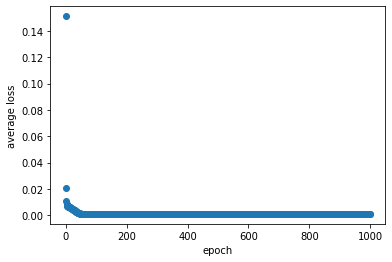

In [47]:
# plot training progress 
# average loss per epoch
plt.scatter(np.arange(num_epochs), losses)
plt.xlabel('epoch')
plt.ylabel('average loss')

plt.show()